###The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units on diverse product categories. The goal is to gain insights on simmilarity of the clients using DBSCAN clustering algoritm**


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


**Exploratory Data Analysis:**

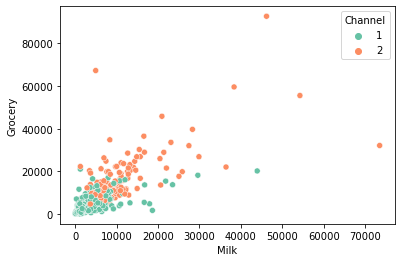

In [5]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel',palette='Set2');

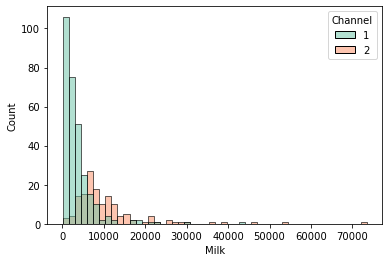

In [6]:
sns.histplot(data=df,x='Milk',hue='Channel',palette='Set2');

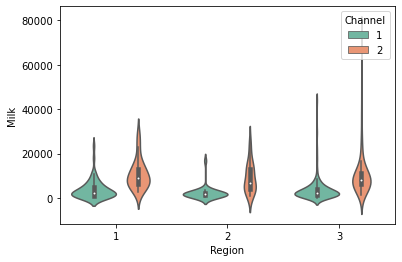

In [7]:
sns.violinplot(data=df,y='Milk',x='Region',hue='Channel',palette='Set2');

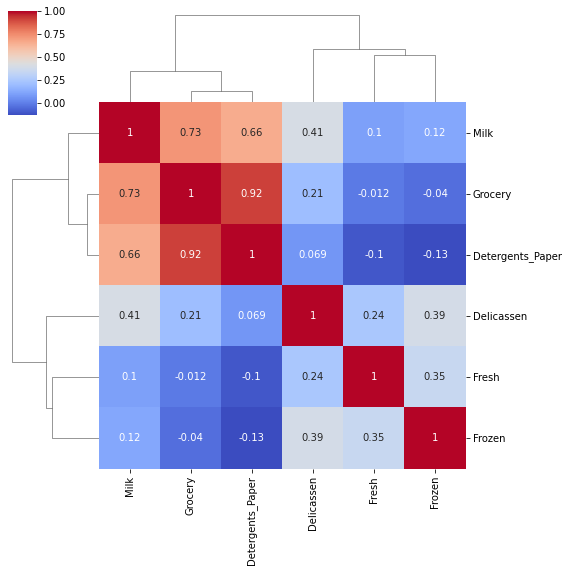

In [8]:
sns.clustermap(data=df.drop(['Channel','Region'],axis=1).corr(),annot=True,figsize=(8,8),cmap='coolwarm');

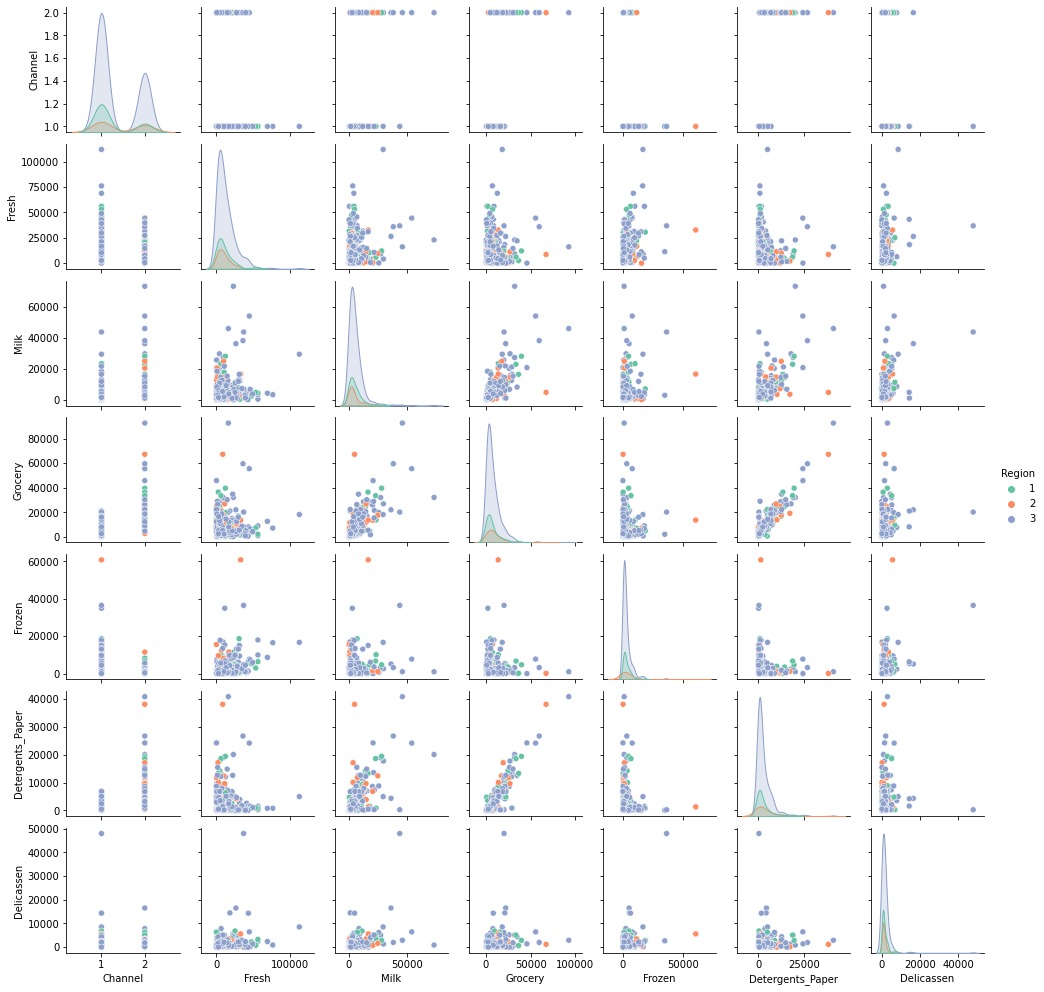

In [9]:
sns.pairplot(data=df,hue='Region',palette='Set2',height=2);

**Since the values of the features are in different orders of magnitude, the data needs to be scaled.**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

**I am going to use a loop to create a variety of DBSCAN models testing different epsilon values.**

In [11]:
from sklearn.cluster import DBSCAN

outliers = []

for i in np.linspace(0.001,3,50):
    
    no_samples = 2*df.shape[1]
    dbscan = DBSCAN(eps=i,min_samples=no_samples)
    dbscan.fit(df_scaled)
    no_outpliers = np.sum(dbscan.labels_ == -1)
    perc_outliers = 100*no_outpliers/len(df_scaled)
    outliers.append(perc_outliers)

**In order to see the difference between the models I am going to create a line plot of the percentage of outlier points versus the epsilon value.**

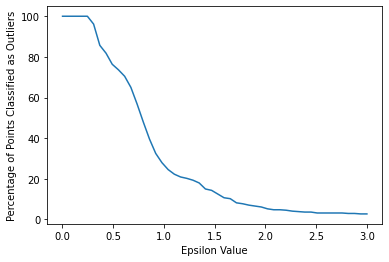

In [12]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outliers)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

**Based on the plot, the epsilon value of eps=2 has been chosen for further analysis.**

In [13]:
dbscan = DBSCAN(eps=2,min_samples=2*df.shape[1])
dbscan.fit(df_scaled)

DBSCAN(eps=2, min_samples=16)

**I will visualize the discovered labels on the scatter plots between different features.**

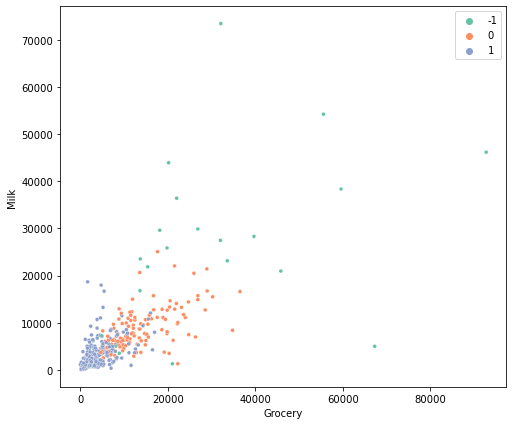

In [14]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_,palette='Set2',s=15);

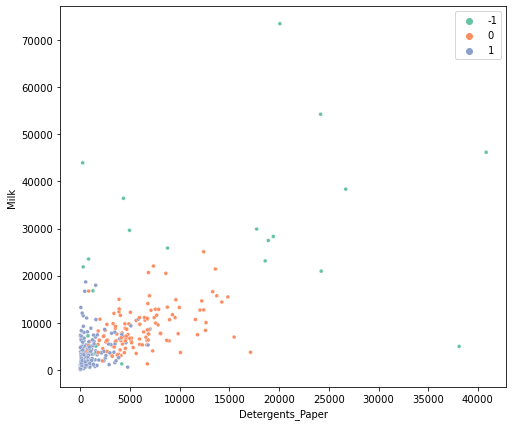

In [15]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df,x='Detergents_Paper',y='Milk',hue=dbscan.labels_,palette='Set2',s=15);

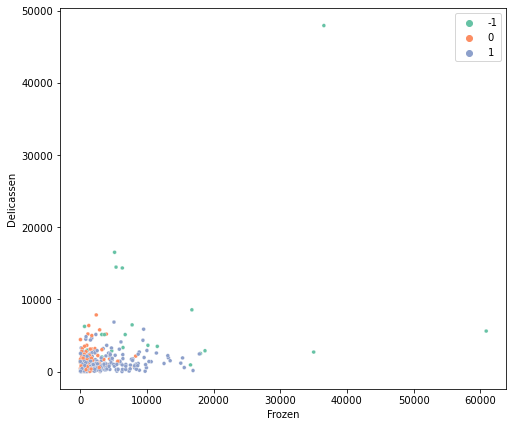

In [16]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df,x='Frozen',y='Delicassen',hue=dbscan.labels_,palette='Set2',s=15);

**I am goint to compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [17]:
df['Labels']=dbscan.labels_

In [18]:
df_mean = df.drop(['Channel','Region'],axis=1).groupby('Labels').mean()
df_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


**I am going to normalize the dataframe's mean values using MinMaxScaler so the spending means will range between 0-1 and I will create a heatmap of the values.**

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
minmax_scaler = MinMaxScaler()
df_mean_scaled = minmax_scaler.fit_transform(df_mean)

In [21]:
df_mean_scaled_labeled = pd.DataFrame(df_mean_scaled,index=[-1,0,1],columns=df_mean.columns)

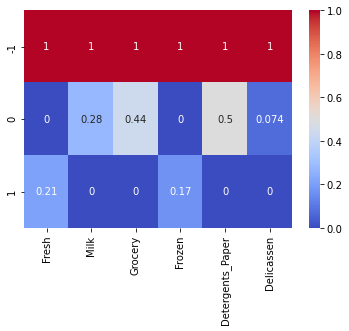

In [22]:
sns.heatmap(df_mean_scaled_labeled,annot=True,cmap='coolwarm');

**Thank you.**